In [72]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [73]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Alice\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [74]:
import pandas as pd

file_path = './csv_recebidos/Distâncias_aeroportos.csv' #Caminho para o arquivo com as distâncias 
file_path1 = './csv_recebidos/Nome_Aeroporto.csv'  #Caminho para o arquivo com os nomes dos aeroportos

#Recebe o conteúdo do .csv e converte em um dataframe
df = pd.read_csv(file_path) 
df_nome = pd.read_csv(file_path1)
df

InputID  TargetID   Distance m  Distance km
0           1         2  2095311,018         2095
1           1         3  1447671,054         1448
2           1         4  2294472,696         2294
3           1         5  2318469,794         2318
4           1         6  2336868,928         2337
...       ...       ...          ...          ...
7305       86        81  918626,4092          919
7306       86        82  821789,0292          822
7307       86        83   561070,647          561
7308       86        84  363014,8721          363
7309       86        85   420748,274          421

[7310 rows x 4 columns]

In [75]:
df = df.drop('Distance m', axis=1)
df.columns = ['InputID', 'TargetID', 'Distância km']
df

InputID  TargetID  Distância km
0           1         2          2095
1           1         3          1448
2           1         4          2294
3           1         5          2318
4           1         6          2337
...       ...       ...           ...
7305       86        81           919
7306       86        82           822
7307       86        83           561
7308       86        84           363
7309       86        85           421

[7310 rows x 3 columns]

In [76]:
mapa_ids = {i+1: nome for i, nome in enumerate(df_nome['Aeroporto'])}  #Associa o nome de cada aeroporto ao df dele

#Substitui o id das colunas InputID e TargetID pelo nome do aeroporto
df['InputID'] = df['InputID'].replace(mapa_ids)
df['TargetID'] = df['TargetID'].replace(mapa_ids)
#Incluir equação de cálculo de CO2 futuramente
df['Emissão de CO2'] = df['Distância km'] * 0.123   #Cria a coluna Emissão de CO2
df

InputID  \
0        Aeroporto Internacional de Guarulhos   
1        Aeroporto Internacional de Guarulhos   
2        Aeroporto Internacional de Guarulhos   
3        Aeroporto Internacional de Guarulhos   
4        Aeroporto Internacional de Guarulhos   
...                                       ...   
7305  Aeroporto Internacional de Porto Alegre   
7306  Aeroporto Internacional de Porto Alegre   
7307  Aeroporto Internacional de Porto Alegre   
7308  Aeroporto Internacional de Porto Alegre   
7309  Aeroporto Internacional de Porto Alegre   

                                            TargetID  Distância km  \
0                  Aeroporto Internacional do Recife          2095   
1                Aeroporto Internacional de Salvador          1448   
2                   Aeroporto Internacional de Natal          2294   
3                Aeroporto Internacional de São Luís          2318   
4               Aeroporto Internacional de Fortaleza          2337   
...                                              ...           ...   
7305  Aeroporto Internacional de São José dos Campos           919   
7306            Aeroporto Internacional de Viracopos           822   
7307             Aeroporto Internacional de Curitiba           561   
7308        Aeroporto Internacional de Florianópolis           363   
7309           Aeroporto Internacional de Navegantes           421   

      Emissão de CO2  
0            257.685  
1            178.104  
2            282.162  
3            285.114  
4            287.451  
...              ...  
7305         113.037  
7306         101.106  
7307          69.003  
7308          44.649  
7309          51.783  

[7310 rows x 4 columns]

In [77]:
#Formata as horas para esta no formato Horas:Minutos
def format_time(hours):
    h = int(hours)
    m = int((hours - h) * 60)
    return f"{h:02}:{m:02}"

# Cálculo do tempo médio para Comercial
df['Tempo Médio Horas - Comercial'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 900)} ~ {format_time(d / 850)}"
)

# Cálculo do tempo médio para Cargueiro
df['Tempo Médio Horas - Cargueiro'] = df['Distância km'].apply(
    lambda d: f"{format_time(d / 850)} ~ {format_time(d / 800)}"
)

df


InputID  \
0        Aeroporto Internacional de Guarulhos   
1        Aeroporto Internacional de Guarulhos   
2        Aeroporto Internacional de Guarulhos   
3        Aeroporto Internacional de Guarulhos   
4        Aeroporto Internacional de Guarulhos   
...                                       ...   
7305  Aeroporto Internacional de Porto Alegre   
7306  Aeroporto Internacional de Porto Alegre   
7307  Aeroporto Internacional de Porto Alegre   
7308  Aeroporto Internacional de Porto Alegre   
7309  Aeroporto Internacional de Porto Alegre   

                                            TargetID  Distância km  \
0                  Aeroporto Internacional do Recife          2095   
1                Aeroporto Internacional de Salvador          1448   
2                   Aeroporto Internacional de Natal          2294   
3                Aeroporto Internacional de São Luís          2318   
4               Aeroporto Internacional de Fortaleza          2337   
...                                              ...           ...   
7305  Aeroporto Internacional de São José dos Campos           919   
7306            Aeroporto Internacional de Viracopos           822   
7307             Aeroporto Internacional de Curitiba           561   
7308        Aeroporto Internacional de Florianópolis           363   
7309           Aeroporto Internacional de Navegantes           421   

      Emissão de CO2 Tempo Médio Horas - Comercial  \
0            257.685                 02:19 ~ 02:27   
1            178.104                 01:36 ~ 01:42   
2            282.162                 02:32 ~ 02:41   
3            285.114                 02:34 ~ 02:43   
4            287.451                 02:35 ~ 02:44   
...              ...                           ...   
7305         113.037                 01:01 ~ 01:04   
7306         101.106                 00:54 ~ 00:58   
7307          69.003                 00:37 ~ 00:39   
7308          44.649                 00:24 ~ 00:25   
7309          51.783                 00:28 ~ 00:29   

     Tempo Médio Horas - Cargueiro  
0                    02:27 ~ 02:37  
1                    01:42 ~ 01:48  
2                    02:41 ~ 02:52  
3                    02:43 ~ 02:53  
4                    02:44 ~ 02:55  
...                            ...  
7305                 01:04 ~ 01:08  
7306                 00:58 ~ 01:01  
7307                 00:39 ~ 00:42  
7308                 00:25 ~ 00:27  
7309                 00:29 ~ 00:31  

[7310 rows x 6 columns]

In [78]:
import numpy as np

aeroportos_interesse = [
    "Aeroporto Internacional de Guarulhos",
    "Aeroporto Internacional do Recife",
    "Aeroporto Internacional de Salvador",
    "Aeroporto Internacional de Natal",
    "Aeroporto Internacional de São Luís",
    "Aeroporto Internacional de Fortaleza"
]

# Gera um numpy array com todos os nomes únicos de aeroportos
unique = df['InputID'].unique()

# Converte para uma lista
lista_origem = unique.tolist()

# Remove os aeroportos nacionais (se existirem na lista)
for i in aeroportos_interesse:
        lista_origem.remove(i)

lista_origem


['Aeroporto Internacional de Nursultan Nazarbayev',
 'Aeroporto Internacional de Xangai Pudong',
 'Aeroporto Internacional de Pequim Capital',
 'Aeroporto Internacional de Pyongyang Sunan',
 'Aeroporto Internacional de Incheon',
 'Aeroporto Internacional Ninoy Aquino',
 'Aeroporto Internacional de Hong Kong',
 'Aeroporto Internacional Indira Gandhi',
 'Aeroporto Internacional Soekarno-Hatta (Jacarta)',
 'Aeroporto Internacional Ngurah Rai (Bali)',
 'Aeroporto Internacional de Narita (Tóquio)',
 'Aeroporto Internacional de Haneda (Tóquio)',
 'Aeroporto Internacional de Kansai (Osaka)',
 'Aeroporto Internacional de Wattay (Vientiane)',
 'Aeroporto Internacional de Kuala Lumpur (Sepang)',
 'Aeroporto Internacional de Penang (Penang)',
 'Aeroporto Internacional de Malé',
 'Aeroporto Internacional de Changi',
 'Aeroporto Internacional de Suvarnabhumi',
 'Aeroporto Internacional Don Mueang',
 'Aeroporto Internacional de Taiwan Taoyuan',
 'Aeroporto Internacional de Tan Son Nhat',
 'Aeroporto

In [79]:
result = []

#Passa por todos os aeroportos internacionais
for i in lista_origem:

    # Inicializando dados para cada aeroporto nacional
    sp = [None, None, None, None]
    pe = [None, None, None, None]
    ba = [None, None, None, None]
    rn = [None, None, None, None]
    ma = [None, None, None, None]
    ce = [None, None, None, None]
    
    #Passa por todos os aeroportos nacionais
    for j in aeroportos_interesse:

        #Seleciona a linha com as informações sobre o aeroporto internacional i e o aerporto nacional j
        linha = df.loc[(df['InputID'] == i) & (df['TargetID'] == j)]
        
        if not linha.empty:  # Certificar que a linha existe no dataset
            #Armazena as informações referentes a essa linha nas variáveis
            distancia = linha['Distância km'].values[0]
            emissao = linha['Emissão de CO2'].values[0]
            tempo_comercial = linha['Tempo Médio Horas - Comercial'].values[0]
            tempo_carga = linha['Tempo Médio Horas - Cargueiro'].values[0]
            
            #Verifica qual o aeroporto que está sendo analisado e armazena as informações na variável correta
            if j == "Aeroporto Internacional de Guarulhos":
                sp = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional do Recife":
                pe = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de Salvador":
                ba = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de Natal":
                rn = [distancia, emissao, tempo_comercial, tempo_carga]
            elif j == "Aeroporto Internacional de São Luís":
                ma = [distancia, emissao, tempo_comercial, tempo_carga]
            else:
                ce = [distancia, emissao, tempo_comercial, tempo_carga]
    
    # Adiciona os dados para a origem atual no resultado
    result.append({
        "Origem": i,
        "São Paulo - Guarulhos (Km)": sp[0],
        "São Paulo - Guarulhos (Kg)": sp[1],
        "São Paulo - Guarulhos (Hr - Comercial)": sp[2],
        "São Paulo - Guarulhos (Hr - Cargueiro)": sp[3],
        "Recife - Guararapes (Km)": pe[0],
        "Recife - Guararapes (Kg)": pe[1],
        "Recife - Guararapes (Hr - Comercial)": pe[2],
        "Recife - Guararapes (Hr - Cargueiro)": pe[3],
        "Salvador - Dpt. Magalhães (Km)": ba[0],
        "Salvador - Dpt. Magalhães (Kg)": ba[1],
        "Salvador - Dpt. Magalhães (Hr - Comercial)": ba[2],
        "Salvador - Dpt. Magalhães (Hr - Cargueiro)": ba[3],
        "Natal - Gov. Alves (Km)": rn[0],
        "Natal - Gov. Alves (Kg)": rn[1],
        "Natal - Gov. Alves (Hr - Comercial)": rn[2],
        "Natal - Gov. Alves (Hr - Cargueiro)": rn[3],
        "São Luiz - Mar. Cunha (Km)": ma[0],
        "São Luiz - Mar. Cunha (Kg)": ma[1],
        "São Luiz - Mar. Cunha (Hr - Comercial)": ma[2],
        "São Luiz - Mar. Cunha (Hr - Cargueiro)": ma[3],
        "Fortaleza - Martins (Km)": ce[0],
        "Fortaleza - Martins (Kg)": ce[1],
        "Fortaleza - Martins (Hr - Comercial)": ce[2],
        "Fortaleza - Martins (Hr - Cargueiro)": ce[3]
    })

#Transforma o dicionário result em um dataframe
df_result = pd.DataFrame(result)
df_result


Origem  \
0   Aeroporto Internacional de Nursultan Nazarbayev   
1          Aeroporto Internacional de Xangai Pudong   
2         Aeroporto Internacional de Pequim Capital   
3        Aeroporto Internacional de Pyongyang Sunan   
4                Aeroporto Internacional de Incheon   
..                                              ...   
74             Aeroporto Internacional de Viracopos   
75              Aeroporto Internacional de Curitiba   
76         Aeroporto Internacional de Florianópolis   
77            Aeroporto Internacional de Navegantes   
78          Aeroporto Internacional de Porto Alegre   

    São Paulo - Guarulhos (Km)  São Paulo - Guarulhos (Kg)  \
0                        13941                    1714.743   
1                        18581                    2285.463   
2                        17578                    2162.094   
3                        18106                    2227.038   
4                        18312                    2252.376   
..                         ...                         ...   
74                         147                      18.081   
75                         340                      41.820   
76                         514                      63.222   
77                         444                      54.612   
78                         864                     106.272   

   São Paulo - Guarulhos (Hr - Comercial)  \
0                           15:29 ~ 16:24   
1                           20:38 ~ 21:51   
2                           19:31 ~ 20:40   
3                           20:07 ~ 21:18   
4                           20:20 ~ 21:32   
..                                    ...   
74                          00:09 ~ 00:10   
75                          00:22 ~ 00:24   
76                          00:34 ~ 00:36   
77                          00:29 ~ 00:31   
78                          00:57 ~ 01:00   

   São Paulo - Guarulhos (Hr - Cargueiro)  Recife - Guararapes (Km)  \
0                           16:24 ~ 17:25                     11852   
1                           21:51 ~ 23:13                     16506   
2                           20:40 ~ 21:58                     15483   
3                           21:18 ~ 22:37                     16057   
4                           21:32 ~ 22:53                     16257   
..                                    ...                       ...   
74                          00:10 ~ 00:11                      2167   
75                          00:24 ~ 00:25                      2425   
76                          00:36 ~ 00:38                      2596   
77                          00:31 ~ 00:33                      2535   
78                          01:00 ~ 01:04                      2956   

    Recife - Guararapes (Kg) Recife - Guararapes (Hr - Comercial)  \
0                   1457.796                        13:10 ~ 13:56   
1                   2030.238                        18:20 ~ 19:25   
2                   1904.409                        17:12 ~ 18:12   
3                   1975.011                        17:50 ~ 18:53   
4                   1999.611                        18:03 ~ 19:07   
..                       ...                                  ...   
74                   266.541                        02:24 ~ 02:32   
75                   298.275                        02:41 ~ 02:51   
76                   319.308                        02:53 ~ 03:03   
77                   311.805                        02:49 ~ 02:58   
78                   363.588                        03:17 ~ 03:28   

   Recife - Guararapes (Hr - Cargueiro)  Salvador - Dpt. Magalhães (Km)  ...  \
0                         13:56 ~ 14:48                           12498  ...   
1                         19:25 ~ 20:37                           17150  ...   
2                         18:12 ~ 19:21                           16130  ...   
3                         18:53 ~ 20:04                           16696  ...   
4               

In [80]:
# Ordenar o DataFrame pelo valor da coluna "São Paulo - Guarulhos (Km)"
df_result_sorted = df_result.sort_values(by="São Paulo - Guarulhos (Km)", ascending=True).reset_index(drop=True)

df_result_sorted.to_csv('./csv_gerado/Tabela_Completa.csv', index=False)

#Adicionar coluna de frete

#Eventualmente o código vai ter outro cálculo de CO2

#Incluir CO2 extra

df_result_sorted

Origem  \
0   Aeroporto Internacional de São José dos Campos   
1             Aeroporto Internacional de Viracopos   
2        Aeroporto Internacional do Rio de Janeiro   
3              Aeroporto Internacional de Curitiba   
4                          Aeroporto Santos Dumont   
..                                             ...   
74      Aeroporto Internacional de Narita (Tóquio)   
75      Aeroporto Internacional de Haneda (Tóquio)   
76        Aeroporto Internacional de Xangai Pudong   
77       Aeroporto Internacional de Taiwan Taoyuan   
78       Aeroporto Internacional de Kansai (Osaka)   

    São Paulo - Guarulhos (Km)  São Paulo - Guarulhos (Kg)  \
0                           65                       7.995   
1                          147                      18.081   
2                          338                      41.574   
3                          340                      41.820   
4                          344                      42.312   
..                         ...                         ...   
74                       18490                    2274.270   
75                       18535                    2279.805   
76                       18581                    2285.463   
77                       18769                    2308.587   
78                       18773                    2309.079   

   São Paulo - Guarulhos (Hr - Comercial)  \
0                           00:04 ~ 00:04   
1                           00:09 ~ 00:10   
2                           00:22 ~ 00:23   
3                           00:22 ~ 00:24   
4                           00:22 ~ 00:24   
..                                    ...   
74                          20:32 ~ 21:45   
75                          20:35 ~ 21:48   
76                          20:38 ~ 21:51   
77                          20:51 ~ 22:04   
78                          20:51 ~ 22:05   

   São Paulo - Guarulhos (Hr - Cargueiro)  Recife - Guararapes (Km)  \
0                           00:04 ~ 00:04                      2038   
1                           00:10 ~ 00:11                      2167   
2                           00:23 ~ 00:25                      1853   
3                           00:24 ~ 00:25                      2425   
4                           00:24 ~ 00:25                      1858   
..                                    ...                       ...   
74                          21:45 ~ 23:06                     16907   
75                          21:48 ~ 23:10                     16920   
76                          21:51 ~ 23:13                     16506   
77                          22:04 ~ 23:27                     16872   
78                          22:05 ~ 23:27                     16924   

    Recife - Guararapes (Kg) Recife - Guararapes (Hr - Comercial)  \
0                    250.674                        02:15 ~ 02:23   
1                    266.541                        02:24 ~ 02:32   
2                    227.919                        02:03 ~ 02:10   
3                    298.275                        02:41 ~ 02:51   
4                    228.534                        02:03 ~ 02:11   
..                       ...                                  ...   
74                  2079.561                        18:47 ~ 19:53   
75                  2081.160                        18:48 ~ 19:54   
76                  2030.238                        18:20 ~ 19:25   
77                  2075.256                        18:44 ~ 19:50   
78                  2081.652                        18:48 ~ 19:54   

   Recife - Guararapes (Hr - Cargueiro)  Salvador - Dpt. Magalhães (Km)  ...  \
0                         02:23 ~ 02:32                            1391  ...   
1                         02:32 ~ 02:42                            1521  ...   
2                         02:10 ~ 02:18                            1213  ...   
3                         02:51 ~ 03:01                            1778  ...   
4                         0

In [81]:
# DataFrame apenas com as distâncias e as origens
df_distancias = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Km)",
    "Recife - Guararapes (Km)",
    "Salvador - Dpt. Magalhães (Km)",
    "Natal - Gov. Alves (Km)",
    "São Luiz - Mar. Cunha (Km)",
    "Fortaleza - Martins (Km)"
])

# DataFrame apenas com as emissões e as origens
df_emissoes = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Kg)",
    "Recife - Guararapes (Kg)",
    "Salvador - Dpt. Magalhães (Kg)",
    "Natal - Gov. Alves (Kg)",
    "São Luiz - Mar. Cunha (Kg)",
    "Fortaleza - Martins (Kg)"
])

# DataFrame apenas com os tempos de voo comercial e as origens
df_tempo_comercial = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Comercial)",
    "Recife - Guararapes (Hr - Comercial)",
    "Salvador - Dpt. Magalhães (Hr - Comercial)",
    "Natal - Gov. Alves (Hr - Comercial)",
    "São Luiz - Mar. Cunha (Hr - Comercial)",
    "Fortaleza - Martins (Hr - Comercial)"
])

# DataFrame apenas com os tempos de voo de carga e as origens
df_tempo_carga = df_result.filter([
    "Origem",
    "São Paulo - Guarulhos (Hr - Cargueiro)",
    "Recife - Guararapes (Hr - Cargueiro)",
    "Salvador - Dpt. Magalhães (Hr - Cargueiro)",
    "Natal - Gov. Alves (Hr - Cargueiro)",
    "São Luiz - Mar. Cunha (Hr - Cargueiro)",
    "Fortaleza - Martins (Hr - Cargueiro)"
])

# Exportar os DataFrames para CSV
df_distancias.to_csv('./csv_gerado/Tabela_Distâncias.csv', index=False)
df_emissoes.to_csv('./csv_gerado/Tabela_Emissão.csv', index=False)
df_tempo_comercial.to_csv('./csv_gerado/Tabela_Tempo_Comercial.csv', index=False)
df_tempo_carga.to_csv('./csv_gerado/Tabela_Tempo_Carga.csv', index=False)

df_distancias


Origem  \
0   Aeroporto Internacional de Nursultan Nazarbayev   
1          Aeroporto Internacional de Xangai Pudong   
2         Aeroporto Internacional de Pequim Capital   
3        Aeroporto Internacional de Pyongyang Sunan   
4                Aeroporto Internacional de Incheon   
..                                              ...   
74             Aeroporto Internacional de Viracopos   
75              Aeroporto Internacional de Curitiba   
76         Aeroporto Internacional de Florianópolis   
77            Aeroporto Internacional de Navegantes   
78          Aeroporto Internacional de Porto Alegre   

    São Paulo - Guarulhos (Km)  Recife - Guararapes (Km)  \
0                        13941                     11852   
1                        18581                     16506   
2                        17578                     15483   
3                        18106                     16057   
4                        18312                     16257   
..                         ...                       ...   
74                         147                      2167   
75                         340                      2425   
76                         514                      2596   
77                         444                      2535   
78                         864                      2956   

    Salvador - Dpt. Magalhães (Km)  Natal - Gov. Alves (Km)  \
0                            12498                    11673   
1                            17150                    16326   
2                            16130                    15285   
3                            16696                    15838   
4                            16898                    16040   
..                             ...                      ...   
74                            1521                     2356   
75                            1778                     2617   
76                            1949                     2802   
77                            1888                     2738   
78                            2309                     3158   

    São Luiz - Mar. Cunha (Km)  Fortaleza - Martins (Km)  
0                        12004                     11724  
1                        16524                     16349  
2                        15429                     15276  
3                        15821                     15769  
4                        16028                     15975  
..                         ...                       ...  
74                        2313                      2372  
75                        2563                      2636  
76                        2813                      2851  
77                        2733                      2778  
78                        3120                      3193  

[79 rows x 7 columns]

In [82]:
#Calcular as distâncias entre os aeroportos nacionais e Natal
dist_sp = (df.loc[(df['InputID'] == "Aeroporto Internacional de Guarulhos") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_pe = (df.loc[(df['InputID'] == "Aeroporto Internacional do Recife") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ba = (df.loc[(df['InputID'] == "Aeroporto Internacional de Salvador") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ma = (df.loc[(df['InputID'] == "Aeroporto Internacional de São Luís") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]
dist_ce = (df.loc[(df['InputID'] == "Aeroporto Internacional de Fortaleza") & (df['TargetID'] == "Aeroporto Internacional de Natal")])['Distância km'].values[0]

Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon']


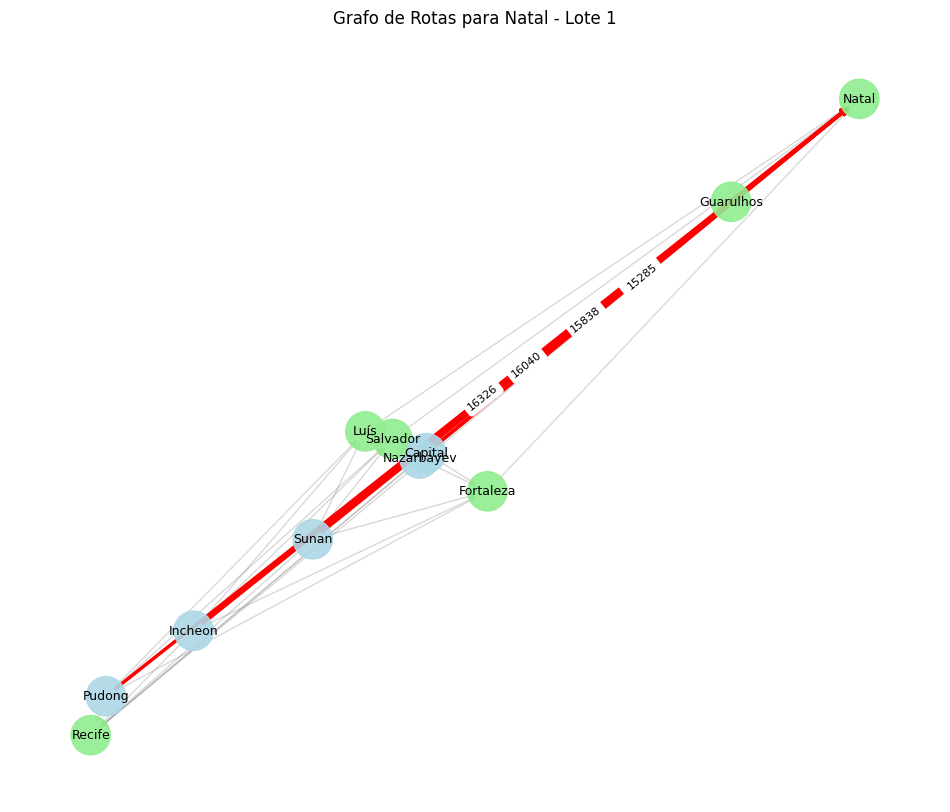

Processando aeroportos: ['Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong', 'Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)']


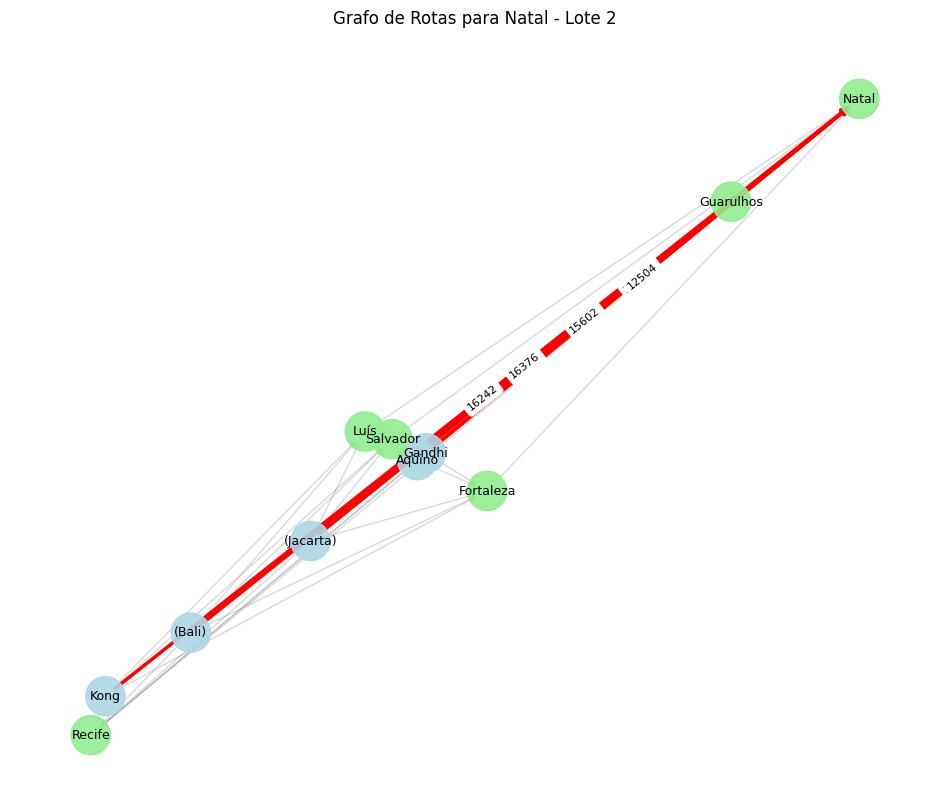

Processando aeroportos: ['Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)', 'Aeroporto Internacional de Kuala Lumpur (Sepang)']


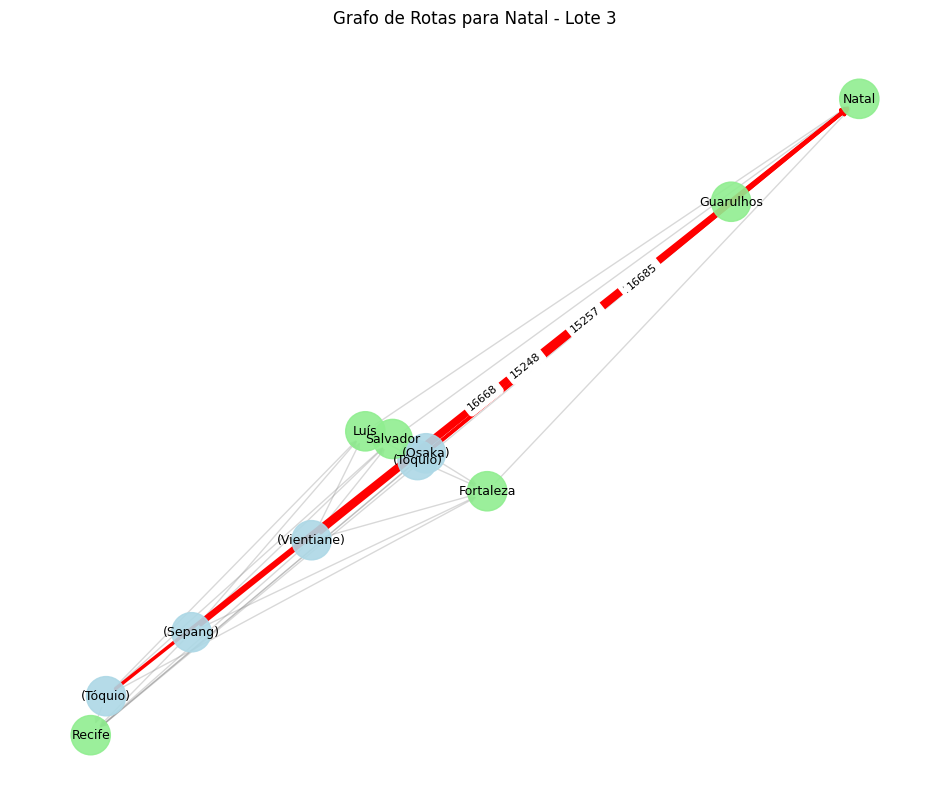

Processando aeroportos: ['Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang']


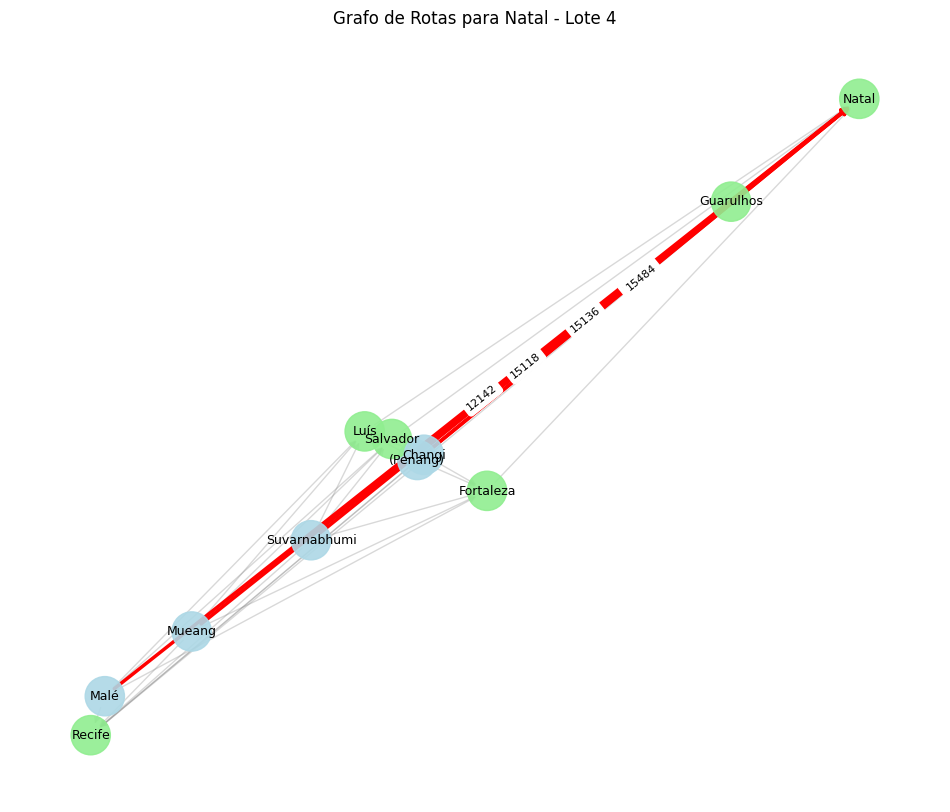

Processando aeroportos: ['Aeroporto Internacional de Taiwan Taoyuan', 'Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin']


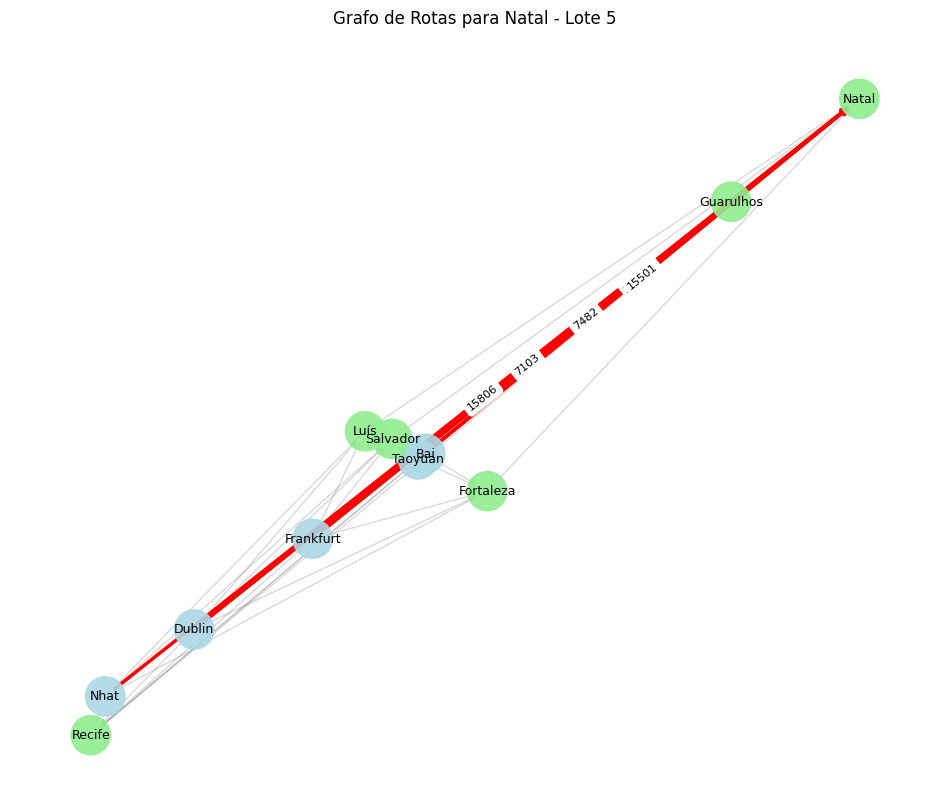

Processando aeroportos: ['Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino', 'Aeroporto de Milão-Malpensa', 'Aeroporto de Praga']


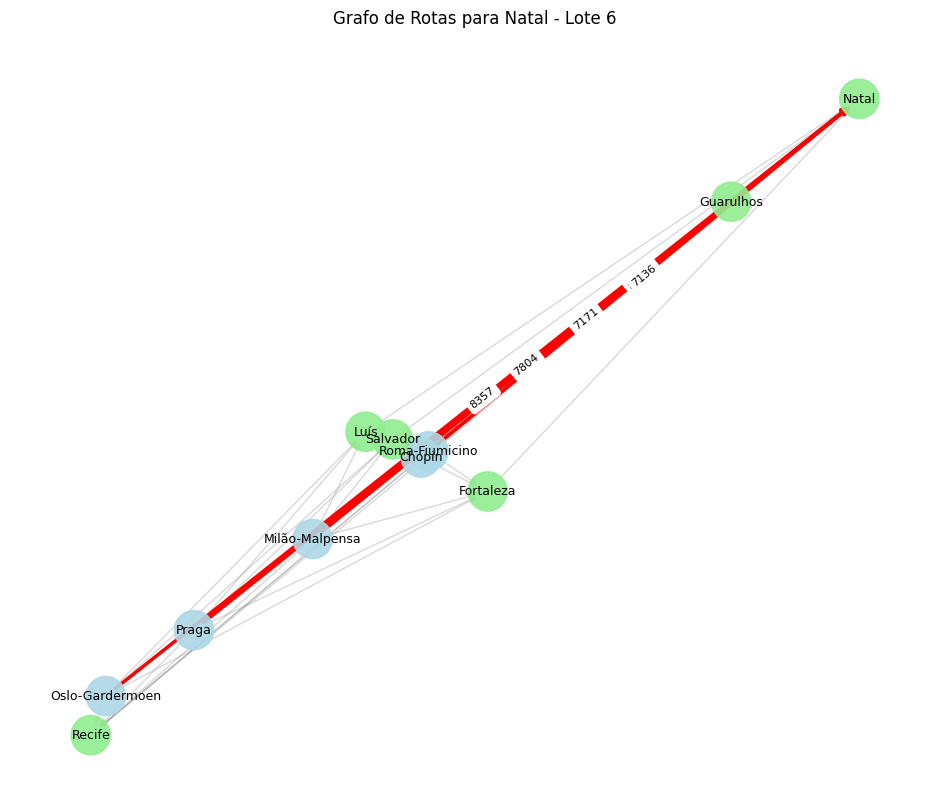

Processando aeroportos: ['Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)']


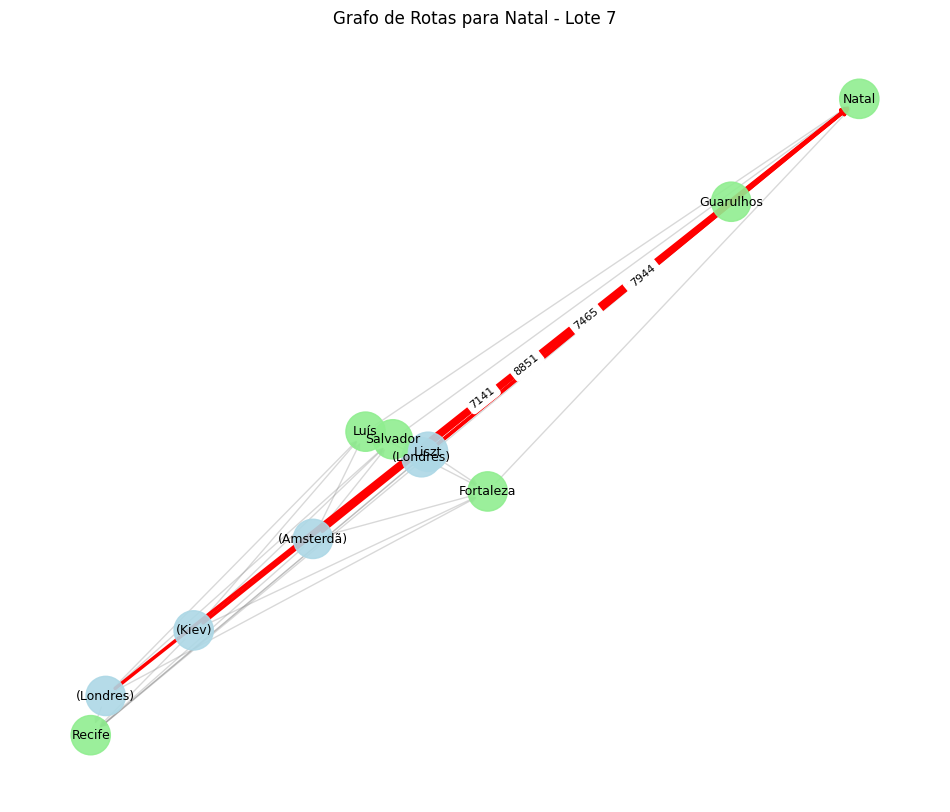

Processando aeroportos: ['Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)']


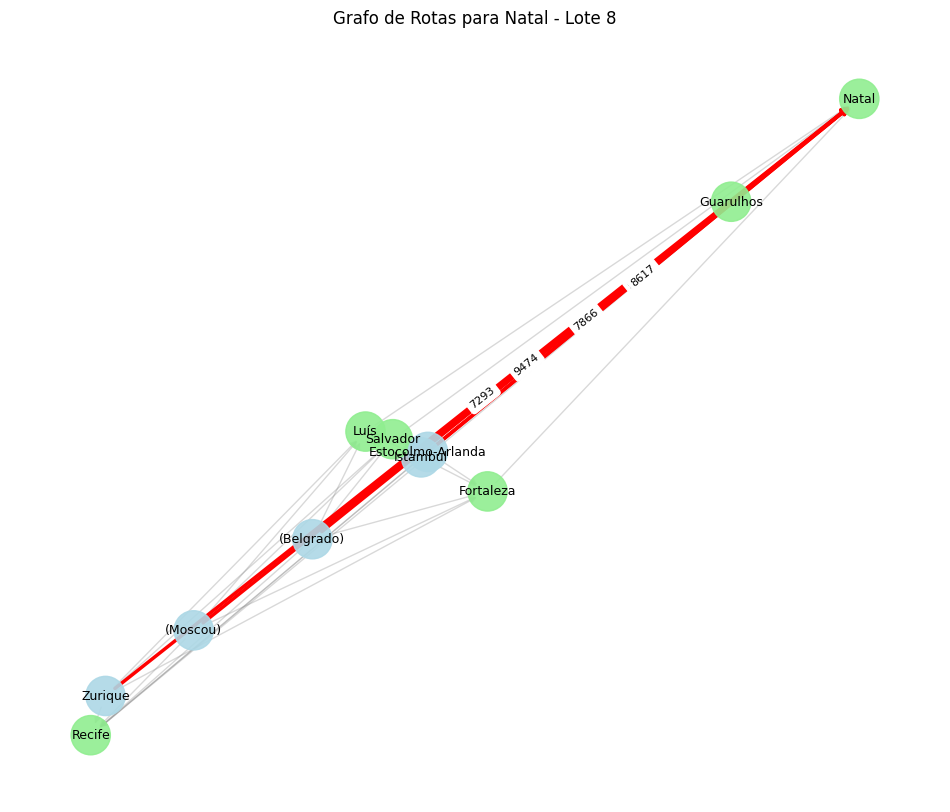

Processando aeroportos: ['Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coand? (Bucareste)', 'Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta']


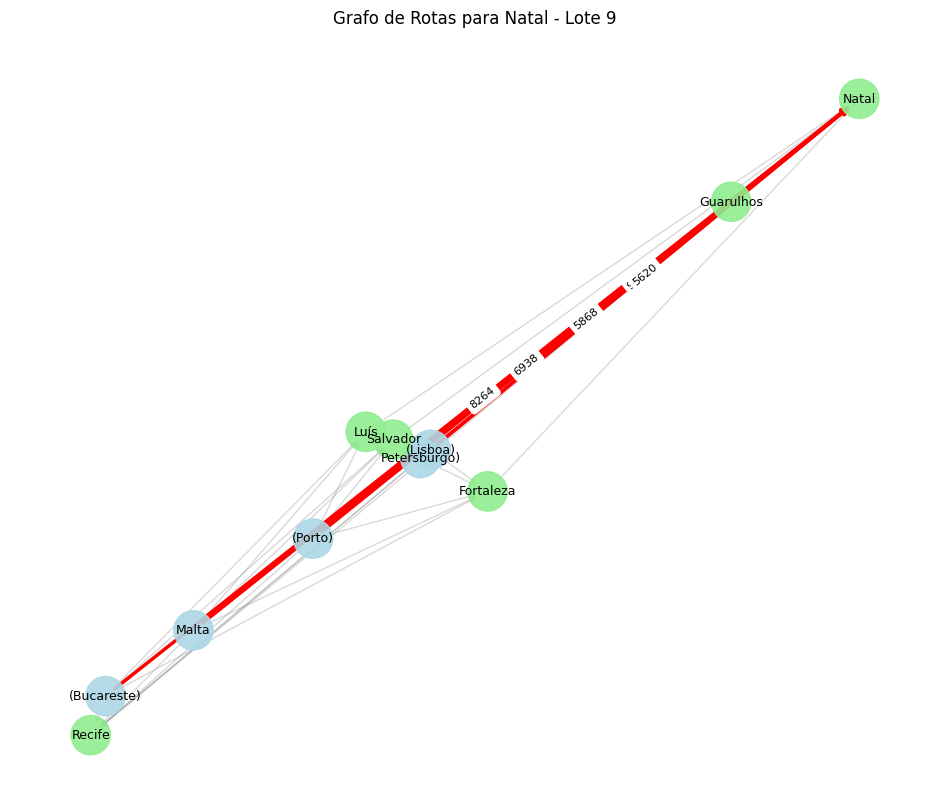

Processando aeroportos: ['Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)', 'Aeroporto de Barcelona-El Prat (Espanha)']


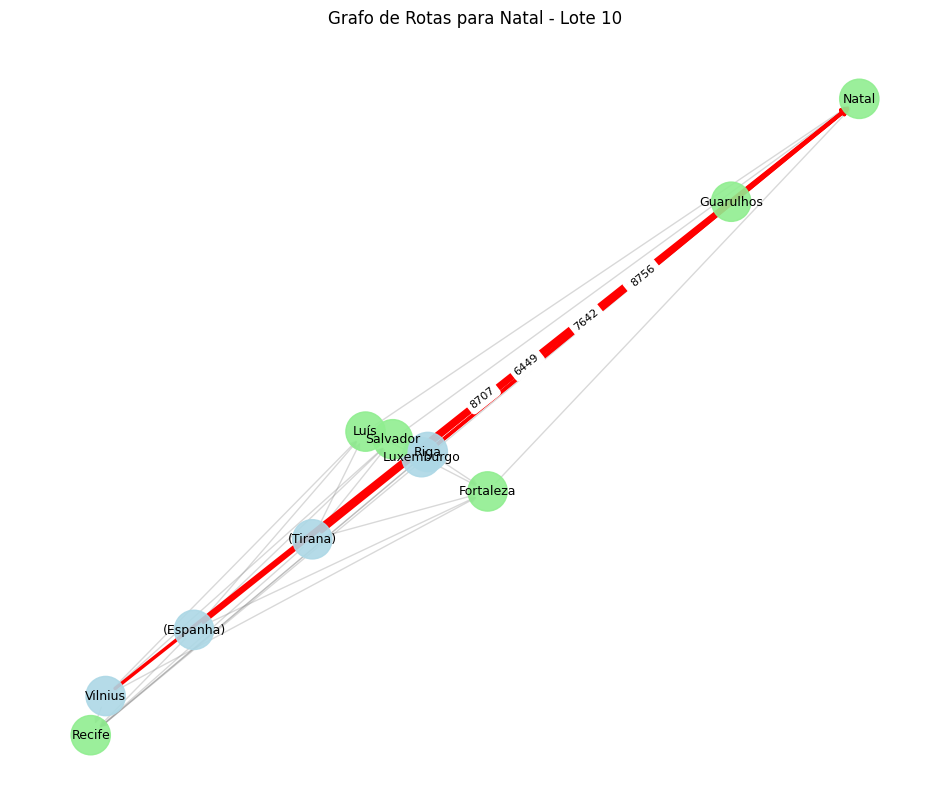

Processando aeroportos: ['Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava']


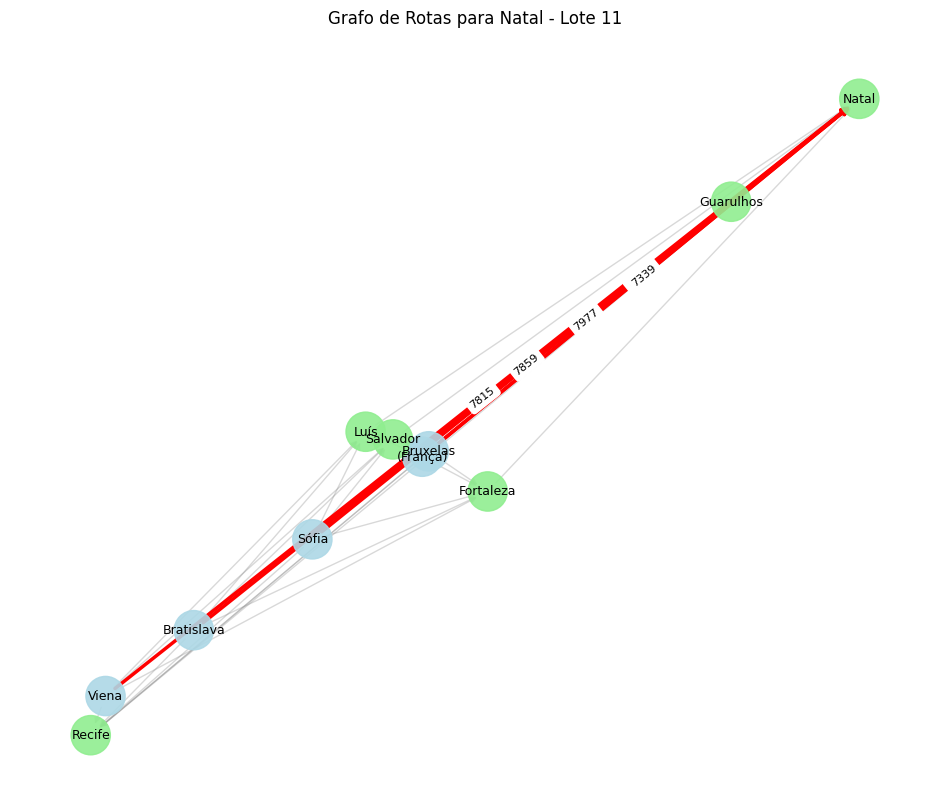

Processando aeroportos: ['Aeroporto de Ljubljana Jo\x9ee Pu?nik', 'Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


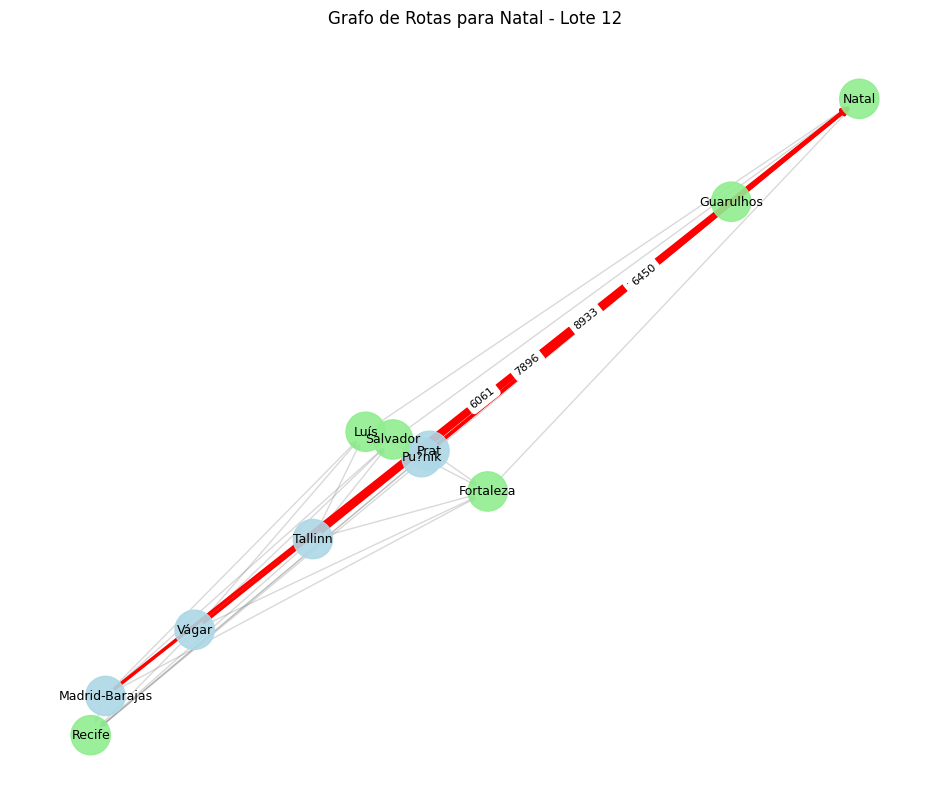

Processando aeroportos: ['Aeroporto de Helsinque', 'Aeroporto Internacional de Brasília', 'Aeroporto Internacional de Várzea Grande', 'Aeroporto Internacional de Belém', 'Aeroporto Internacional de Tabatinga']


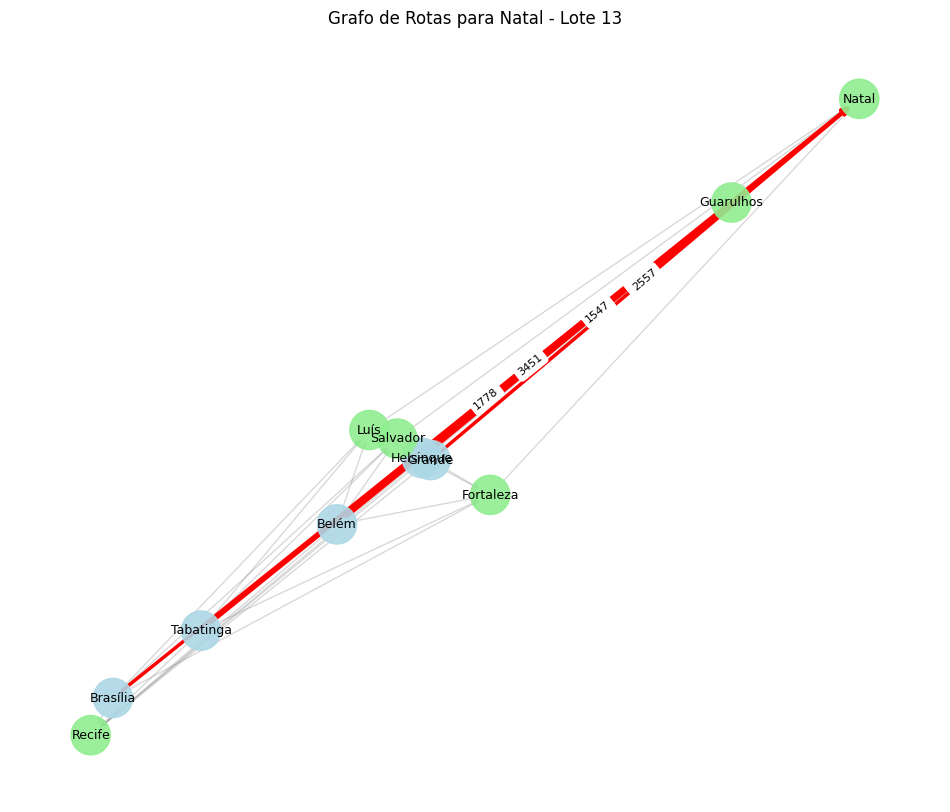

Processando aeroportos: ['Aeroporto Internacional de Manaus', 'Aeroporto Internacional de Macapá', 'Aeroporto Internacional de Maceió', 'Aeroporto Internacional de Aracaju', 'Aeroporto Internacional de Belo Horizonte']


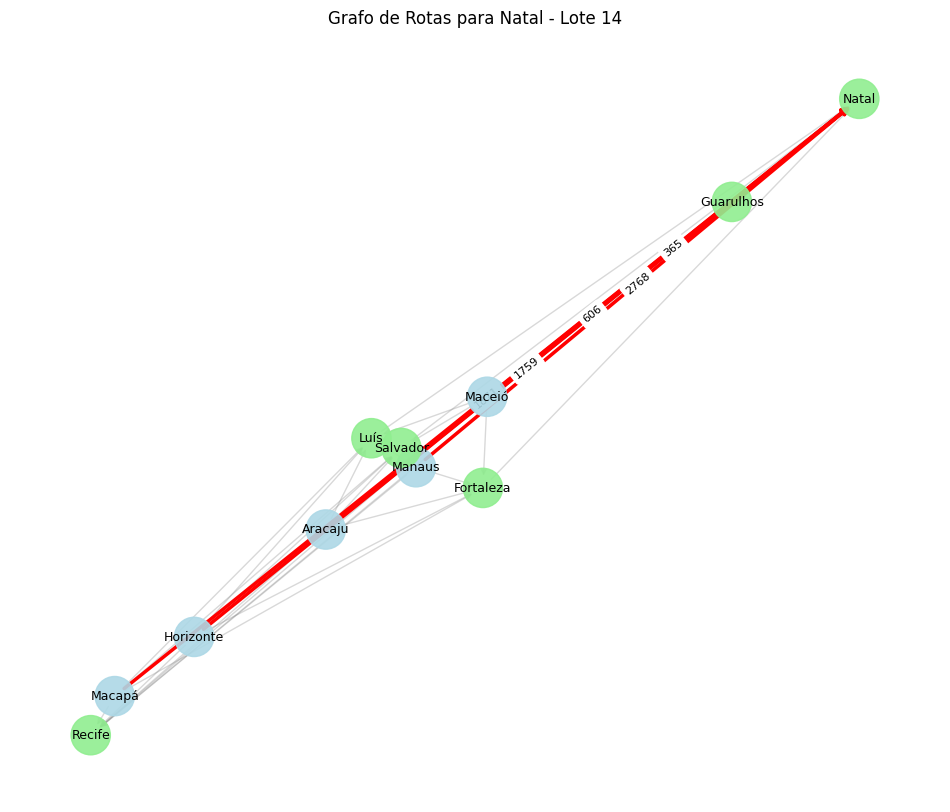

Processando aeroportos: ['Aeroporto Santos Dumont', 'Aeroporto Internacional do Rio de Janeiro', 'Aeroporto Internacional de Vitória', 'Aeroporto Internacional de São José dos Campos', 'Aeroporto Internacional de Viracopos']


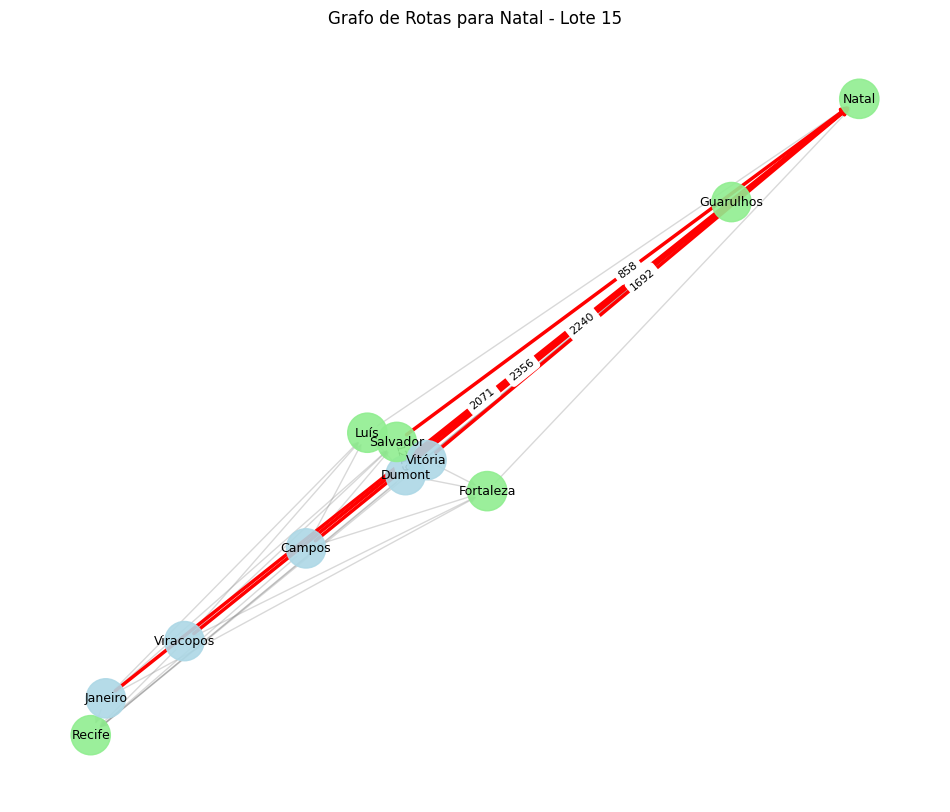

Processando aeroportos: ['Aeroporto Internacional de Curitiba', 'Aeroporto Internacional de Florianópolis', 'Aeroporto Internacional de Navegantes', 'Aeroporto Internacional de Porto Alegre']


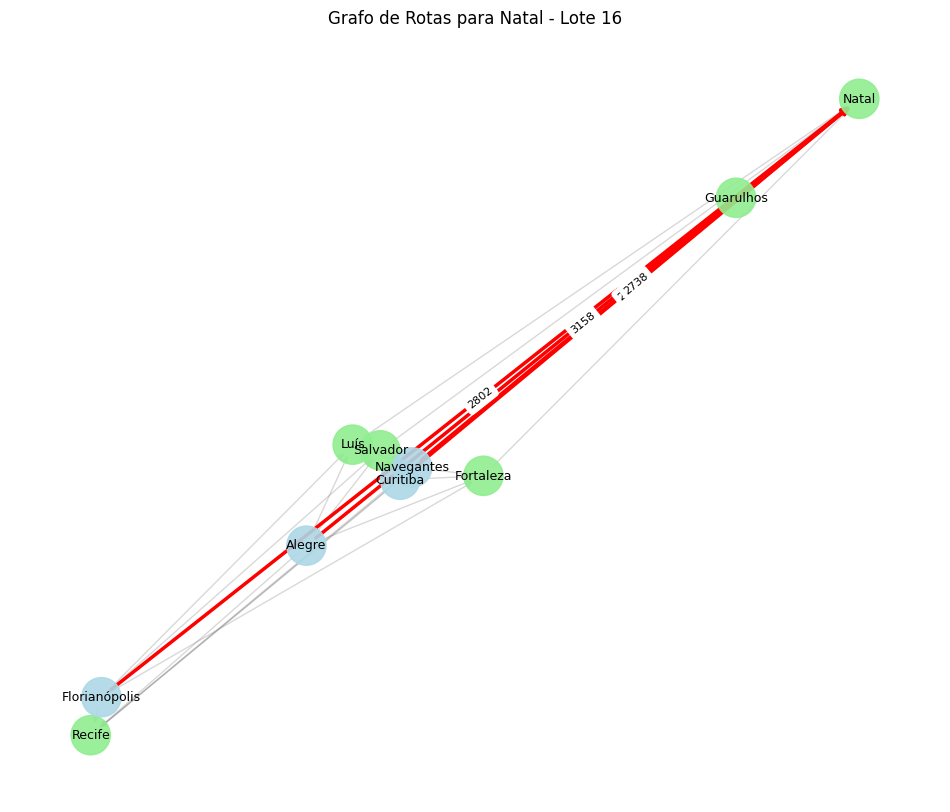

In [83]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Função para carregar um grafo a partir de um DataFrame
def load_graph_from_df(df, source_airports, interest_airports, natal_airport):
    # Dicionário contendo a distância de aeroportos específicos até Natal
    distancia_natal = {
        "Aeroporto Internacional de Guarulhos": dist_sp,
        "Aeroporto Internacional do Recife": dist_pe,
        "Aeroporto Internacional de Salvador": dist_ba,
        "Aeroporto Internacional de São Luís": dist_ma,
        "Aeroporto Internacional de Fortaleza": dist_ce,
    }

    # Filtrar o DataFrame para incluir apenas as rotas relevantes
    filtered_df = df[
        (df['InputID'].isin(source_airports)) &  # Apenas rotas com origem no lote atual
        (df['TargetID'].isin(interest_airports))  # Apenas rotas com destino em aeroportos de interesse
    ]

    # Criar um grafo direcionado
    G = nx.DiGraph()

    # Adicionar arestas com pesos ao grafo
    for _, row in filtered_df.iterrows():
        source = row['InputID']
        target = row['TargetID']
        distance = row['Distância km']

        # Inicializar o peso como a distância da rota
        weight = distance

        # Adicionar penalidade se o destino não for Natal
        if target != natal_airport:
            weight += distancia_natal.get(source, 0)  # Penalidade baseada no dicionário de distâncias

        # Adicionar a aresta ao grafo
        G.add_edge(source, target, weight=weight, distance=distance)

    # Garantir a existência de arestas diretas entre aeroportos nacionais e Natal
    for airport in distancia_natal:
        if not G.has_edge(airport, natal_airport):  # Adicionar apenas se a aresta ainda não existir
            distance = distancia_natal[airport]
            weight = distance  # Peso é igual à distância direta
            G.add_edge(airport, natal_airport, weight=weight, distance=distance)

    return G

# Função para destacar as rotas ideais
def highlight_routes(G, source_airports, natal_airport):
    # Conjunto para armazenar as arestas dos caminhos ideais
    ideal_path_edges = set()

    for source in source_airports:
        try:
            # Encontrar o caminho de menor peso de cada aeroporto de origem até Natal
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            # Adicionar todas as arestas do caminho ideal ao conjunto
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue  # Ignorar aeroportos sem caminhos válidos para Natal

    return list(ideal_path_edges)  # Retornar como lista

# Função para plotar o grafo destacando as rotas ideais
def plot_clean_graph(G, ideal_path_edges, interest_airports, title_suffix):
    # Gerar a disposição dos nós no gráfico
    pos = nx.spring_layout(G, k=0.5, seed=42)

    plt.figure(figsize=(12, 10))

    # Definir cores para os nós
    node_colors = [
        'lightgreen' if node in interest_airports else 'lightblue' for node in G.nodes
    ]

    # Mapear rótulos para exibir apenas a cidade (última parte do nome do aeroporto)
    node_labels = {
        node: node.split(' ')[-1]
        for node in G.nodes
    }

    # Desenhar os nós
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)

    # Desenhar as arestas regulares em cinza
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)

    # Destacar as arestas ideais em vermelho
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)

    # Adicionar rótulos aos nós
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    # Adicionar rótulos às arestas destacadas (exibindo o peso)
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)

    # Configurar título e exibição do gráfico
    plt.title(f'Grafo de Rotas para Natal - {title_suffix}')
    plt.axis('off')
    plt.show()

# Definir o aeroporto de destino final
natal = "Aeroporto Internacional de Natal"

# Processar aeroportos em lotes de 5
batch_size = 5
for i in range(0, len(lista_origem), batch_size):
    # Dividir os aeroportos de origem em lotes
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")

    # Criar o grafo apenas com dados do lote atual
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse, natal)

    # Calcular as rotas ideais para Natal
    ideal_path_edges = highlight_routes(G, subset_origem, natal)

    # Plotar o grafo destacando as rotas ideais
    plot_clean_graph(G, ideal_path_edges, aeroportos_interesse, title_suffix=f"Lote {i // batch_size + 1}")


Processando aeroportos: ['Aeroporto Internacional de Nursultan Nazarbayev', 'Aeroporto Internacional de Xangai Pudong', 'Aeroporto Internacional de Pequim Capital', 'Aeroporto Internacional de Pyongyang Sunan', 'Aeroporto Internacional de Incheon', 'Aeroporto Internacional Ninoy Aquino', 'Aeroporto Internacional de Hong Kong', 'Aeroporto Internacional Indira Gandhi', 'Aeroporto Internacional Soekarno-Hatta (Jacarta)', 'Aeroporto Internacional Ngurah Rai (Bali)']


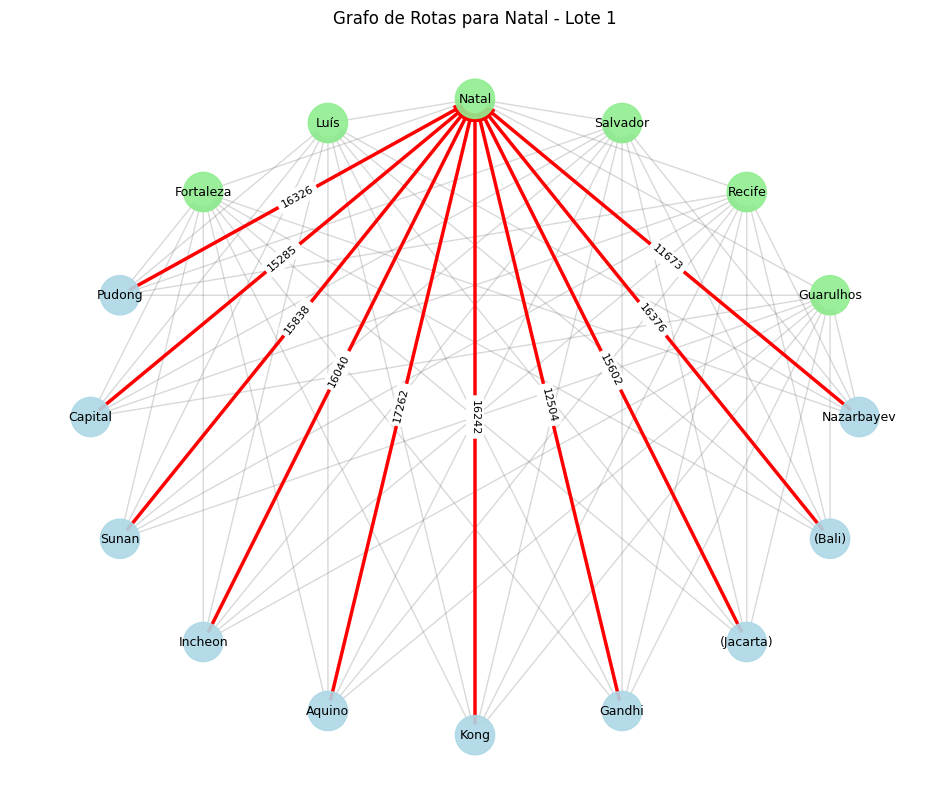

Processando aeroportos: ['Aeroporto Internacional de Narita (Tóquio)', 'Aeroporto Internacional de Haneda (Tóquio)', 'Aeroporto Internacional de Kansai (Osaka)', 'Aeroporto Internacional de Wattay (Vientiane)', 'Aeroporto Internacional de Kuala Lumpur (Sepang)', 'Aeroporto Internacional de Penang (Penang)', 'Aeroporto Internacional de Malé', 'Aeroporto Internacional de Changi', 'Aeroporto Internacional de Suvarnabhumi', 'Aeroporto Internacional Don Mueang']


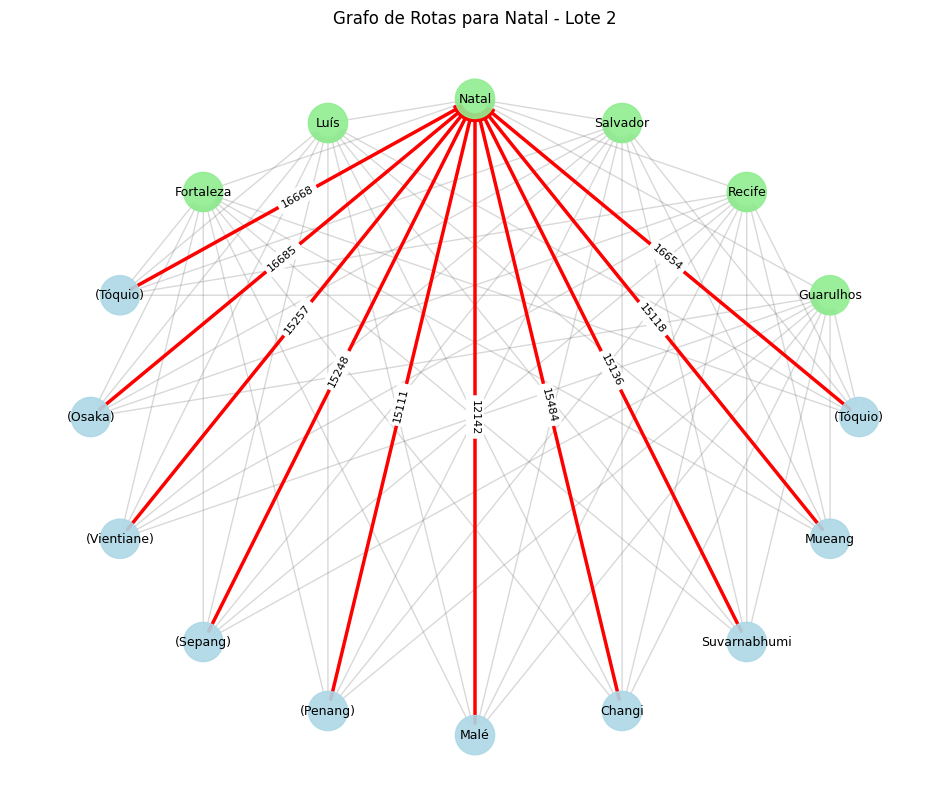

Processando aeroportos: ['Aeroporto Internacional de Taiwan Taoyuan', 'Aeroporto Internacional de Tan Son Nhat', 'Aeroporto Internacional de Noi Bai', 'Aeroporto de Frankfurt', 'Aeroporto de Dublin', 'Aeroporto de Varsóvia Chopin', 'Aeroporto de Oslo-Gardermoen', 'Aeroporto de Roma-Fiumicino', 'Aeroporto de Milão-Malpensa', 'Aeroporto de Praga']


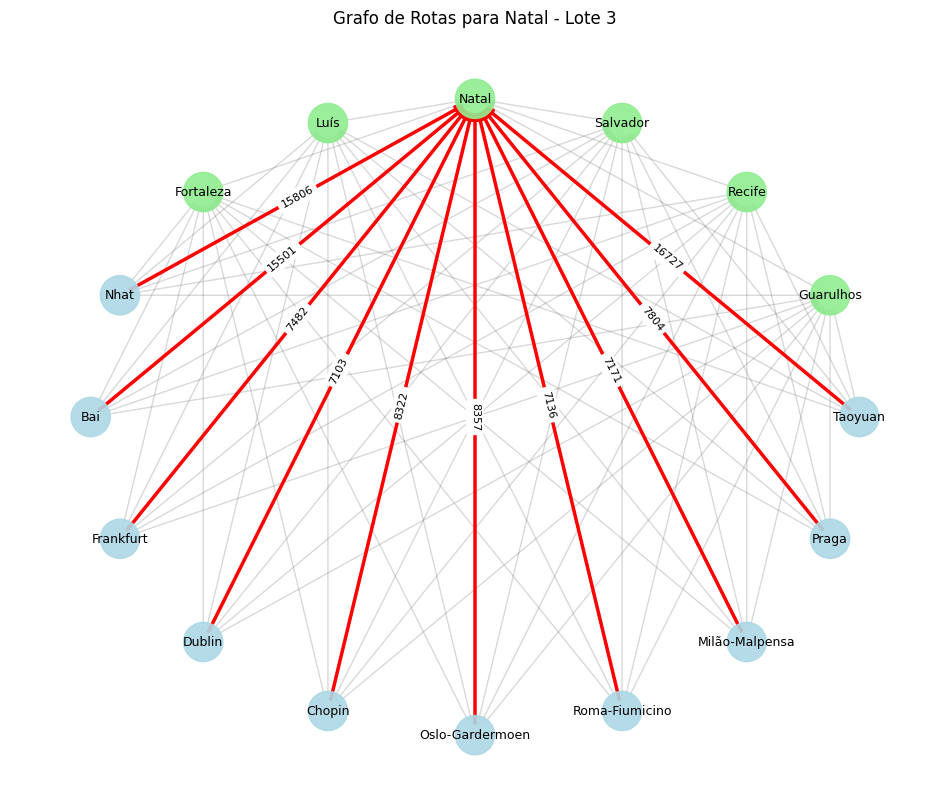

Processando aeroportos: ['Aeroporto de Heathrow (Londres)', 'Aeroporto de Gatwick (Londres)', 'Aeroporto Internacional de Budapeste Ferenc Liszt', 'Aeroporto de Schiphol (Amsterdã)', 'Aeroporto Internacional de Boryspil (Kiev)', 'Aeroporto de Istambul', 'Aeroporto de Zurique', 'Aeroporto de Estocolmo-Arlanda', 'Aeroporto Nikola Tesla (Belgrado)', 'Aeroporto Internacional Sheremetyevo (Moscou)']


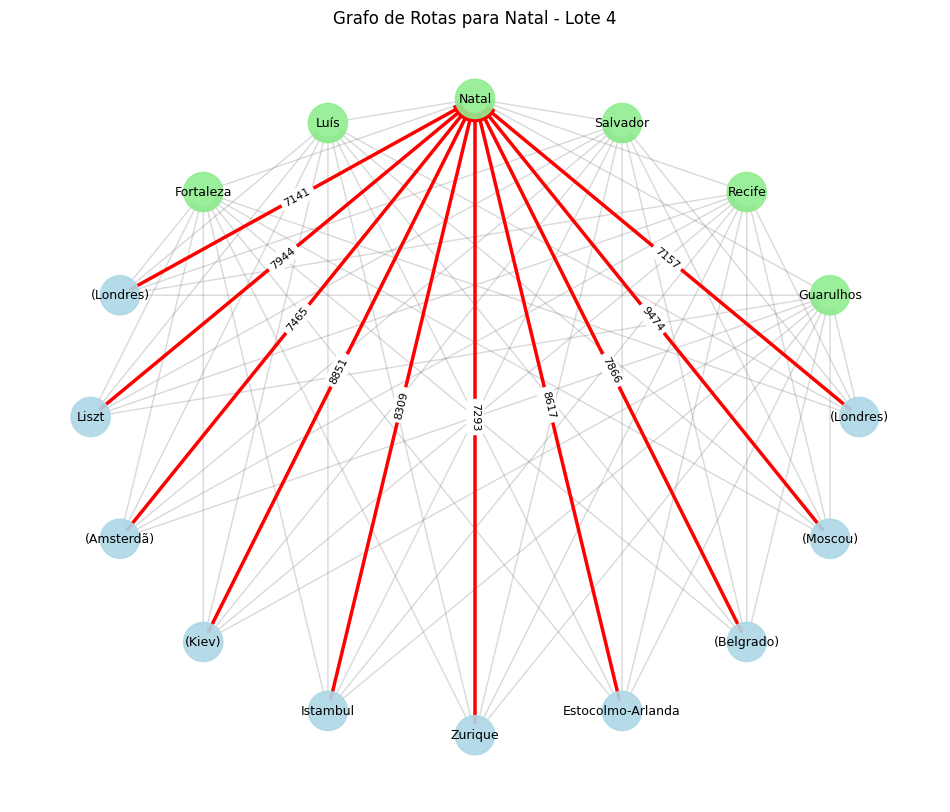

Processando aeroportos: ['Aeroporto de Pulkovo (São Petersburgo)', 'Aeroporto Internacional Henri Coand? (Bucareste)', 'Aeroporto Humberto Delgado (Lisboa)', 'Aeroporto Francisco Sá Carneiro (Porto)', 'Aeroporto Internacional de Malta', 'Aeroporto de Luxemburgo', 'Aeroporto Internacional de Vilnius', 'Aeroporto Internacional de Riga', 'Aeroporto Internacional Madre Teresa (Tirana)', 'Aeroporto de Barcelona-El Prat (Espanha)']


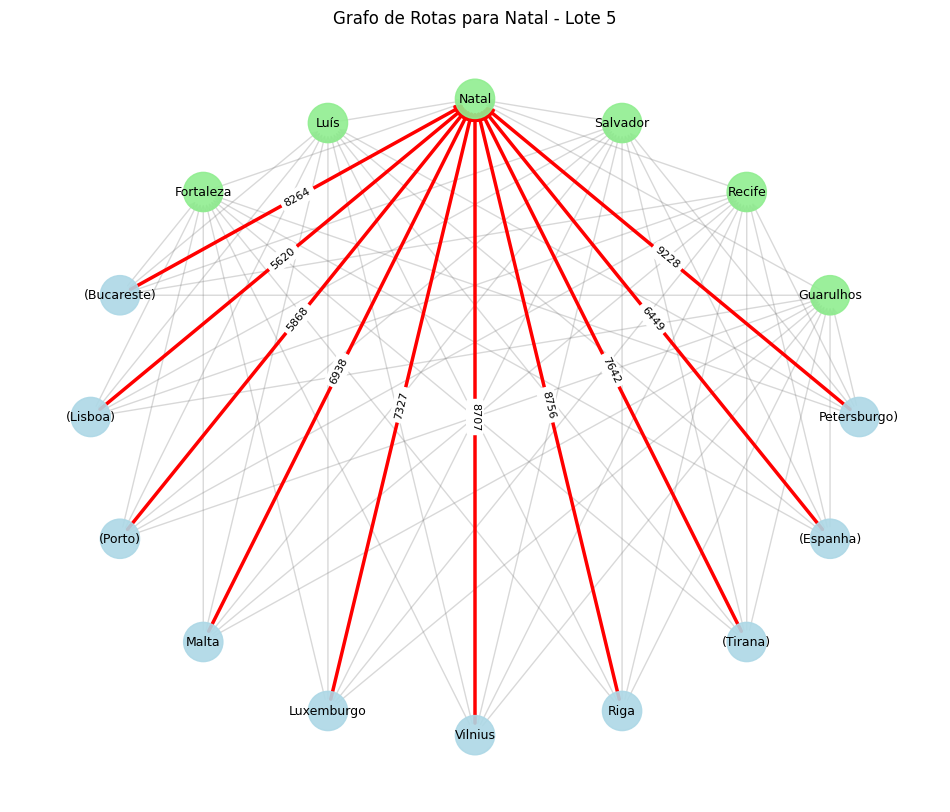

Processando aeroportos: ['Aeroporto de Toulouse-Blagnac (França)', 'Aeroporto Internacional de Viena', 'Aeroporto de Bruxelas', 'Aeroporto de Sófia', 'Aeroporto de Bratislava', 'Aeroporto de Ljubljana Jo\x9ee Pu?nik', 'Aeroporto Adolfo Suárez Madrid-Barajas', 'Aeroporto de Barcelona-El Prat', 'Aeroporto de Tallinn', 'Aeroporto de Vágar']


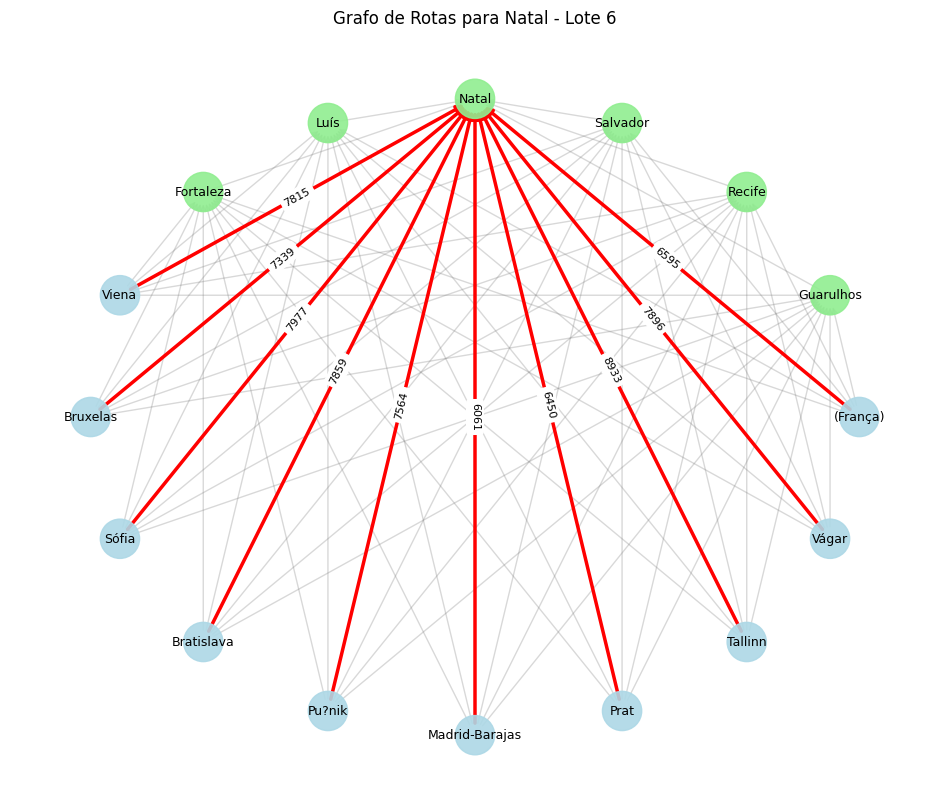

Processando aeroportos: ['Aeroporto de Helsinque', 'Aeroporto Internacional de Brasília', 'Aeroporto Internacional de Várzea Grande', 'Aeroporto Internacional de Belém', 'Aeroporto Internacional de Tabatinga', 'Aeroporto Internacional de Manaus', 'Aeroporto Internacional de Macapá', 'Aeroporto Internacional de Maceió', 'Aeroporto Internacional de Aracaju', 'Aeroporto Internacional de Belo Horizonte']


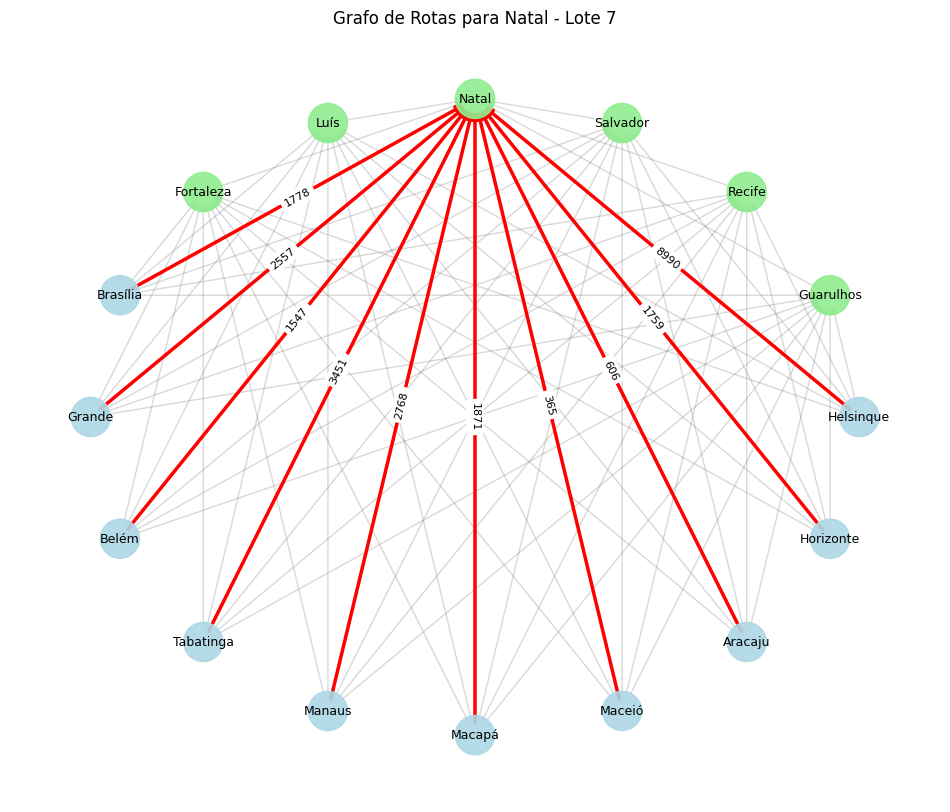

Processando aeroportos: ['Aeroporto Santos Dumont', 'Aeroporto Internacional do Rio de Janeiro', 'Aeroporto Internacional de Vitória', 'Aeroporto Internacional de São José dos Campos', 'Aeroporto Internacional de Viracopos', 'Aeroporto Internacional de Curitiba', 'Aeroporto Internacional de Florianópolis', 'Aeroporto Internacional de Navegantes', 'Aeroporto Internacional de Porto Alegre']


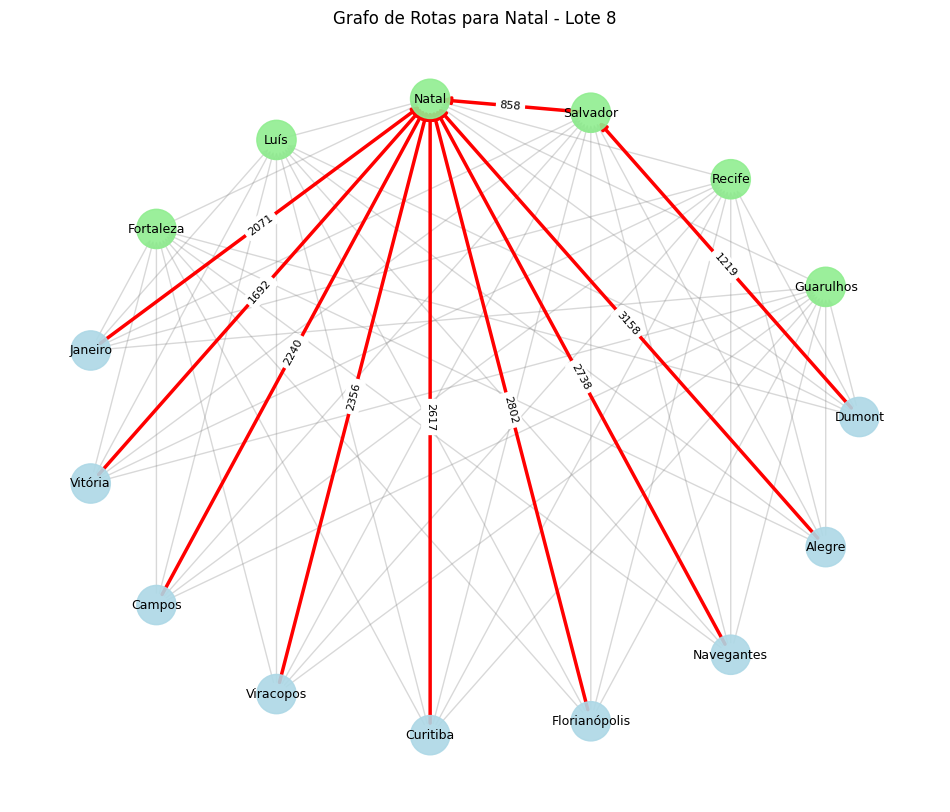

In [85]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


def load_graph_from_df(df, source_airports, interest_airports, natal_airport):
    distancia_natal = {
        "Aeroporto Internacional de Guarulhos": dist_sp,
        "Aeroporto Internacional do Recife": dist_pe,
        "Aeroporto Internacional de Salvador": dist_ba,
        "Aeroporto Internacional de São Luís": dist_ma,
        "Aeroporto Internacional de Fortaleza": dist_ce,
    }

    # Filtrar o DataFrame para incluir apenas os aeroportos do lote atual e de interesse
    filtered_df = df[
        (df['InputID'].isin(source_airports)) & 
        (df['TargetID'].isin(interest_airports))
    ]

    # Criar grafo direcionado
    G = nx.DiGraph()

    # Adicionar arestas com pesos ao grafo
    for _, linha in filtered_df.iterrows():
        source = linha['InputID']
        target = linha['TargetID']
        # Peso baseado apenas na distância
        weight = linha['Distância km']

        # Adicionar penalidade específica se o destino não for Natal
        if target != natal_airport:
            weight += distancia_natal.get(source, 0)  # Soma a distância específica

        G.add_edge(source, target, weight=weight)

    # Adicionar arestas diretas de todos os aeroportos nacionais para Natal, caso ainda não existam
    for airport in distancia_natal:
        if not G.has_edge(airport, natal_airport):

            weight = distancia_natal[airport]
            G.add_edge(airport, natal_airport, weight=weight)

    return G

def highlight_routes(G, source_airports, natal_airport):
    ideal_path_edges = set()

    for source in source_airports:
        try:
            # Encontrar o caminho de menor peso
            path = nx.shortest_path(G, source=source, target=natal_airport, weight='weight')
            for i in range(len(path) - 1):
                edge = (path[i], path[i + 1])
                ideal_path_edges.add(edge)
        except nx.NetworkXNoPath:
            continue  # Ignorar se não houver caminho

    return list(ideal_path_edges)

def plot_clean_graph(G, ideal_path_edges, interest_airports, title_suffix):
    pos = nx.circular_layout(G)  # Layout ajustado

    plt.figure(figsize=(12, 10))

    # Definir cores dos nós
    node_colors = [
        'lightgreen' if node in interest_airports else 'lightblue' for node in G.nodes
    ]

    # Mapear os rótulos para exibir apenas a cidade
    node_labels = {
        node: node.split(' ')[-1]
        for node in G.nodes
    }

    # Desenhar nós
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=800, alpha=0.9)

    # Arestas regulares
    regular_edges = [edge for edge in G.edges if edge not in ideal_path_edges]
    nx.draw_networkx_edges(G, pos, edgelist=regular_edges, edge_color='gray', alpha=0.3, width=1)

    # Arestas ideais em vermelho
    nx.draw_networkx_edges(G, pos, edgelist=ideal_path_edges, edge_color='red', width=2.5)

    # Rótulos dos nós
    nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=9, font_color='black')

    # Rótulos para as arestas ideais
    edge_labels = nx.get_edge_attributes(G, 'weight')
    highlighted_labels = {edge: f"{weight}" for edge, weight in edge_labels.items() if edge in ideal_path_edges}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=highlighted_labels, font_size=8)

    plt.title(f'Grafo de Rotas para Natal - {title_suffix}')
    plt.axis('off')
    plt.show()

natal = 'Aeroporto Internacional de Natal'

# Processar os aeroportos em grupos de 5
batch_size = 10
for i in range(0, len(lista_origem), batch_size):
    subset_origem = lista_origem[i:i + batch_size]
    print(f"Processando aeroportos: {subset_origem}")

    # Carregar o grafo apenas com dados do lote atual
    G = load_graph_from_df(df, subset_origem, aeroportos_interesse, natal)

    # Calcular rotas ideais para Natal
    ideal_path_edges = highlight_routes(G, subset_origem, natal)

    # Plotar o grafo com as rotas ideais destacadas
    plot_clean_graph(G, ideal_path_edges, aeroportos_interesse, title_suffix=f"Lote {i // batch_size + 1}")
